In [30]:
#importing all the libraries
import pandas as pd
from numpy import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [2]:
# Read data
df = pd.read_csv('kc_house.csv')

In [3]:
#It will show top 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#show all columns of dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
#show how many row & columns 
df.shape

(21613, 21)

In [6]:
## Get number of missing values in each column
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#calling describe method to view some basic statistical details
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


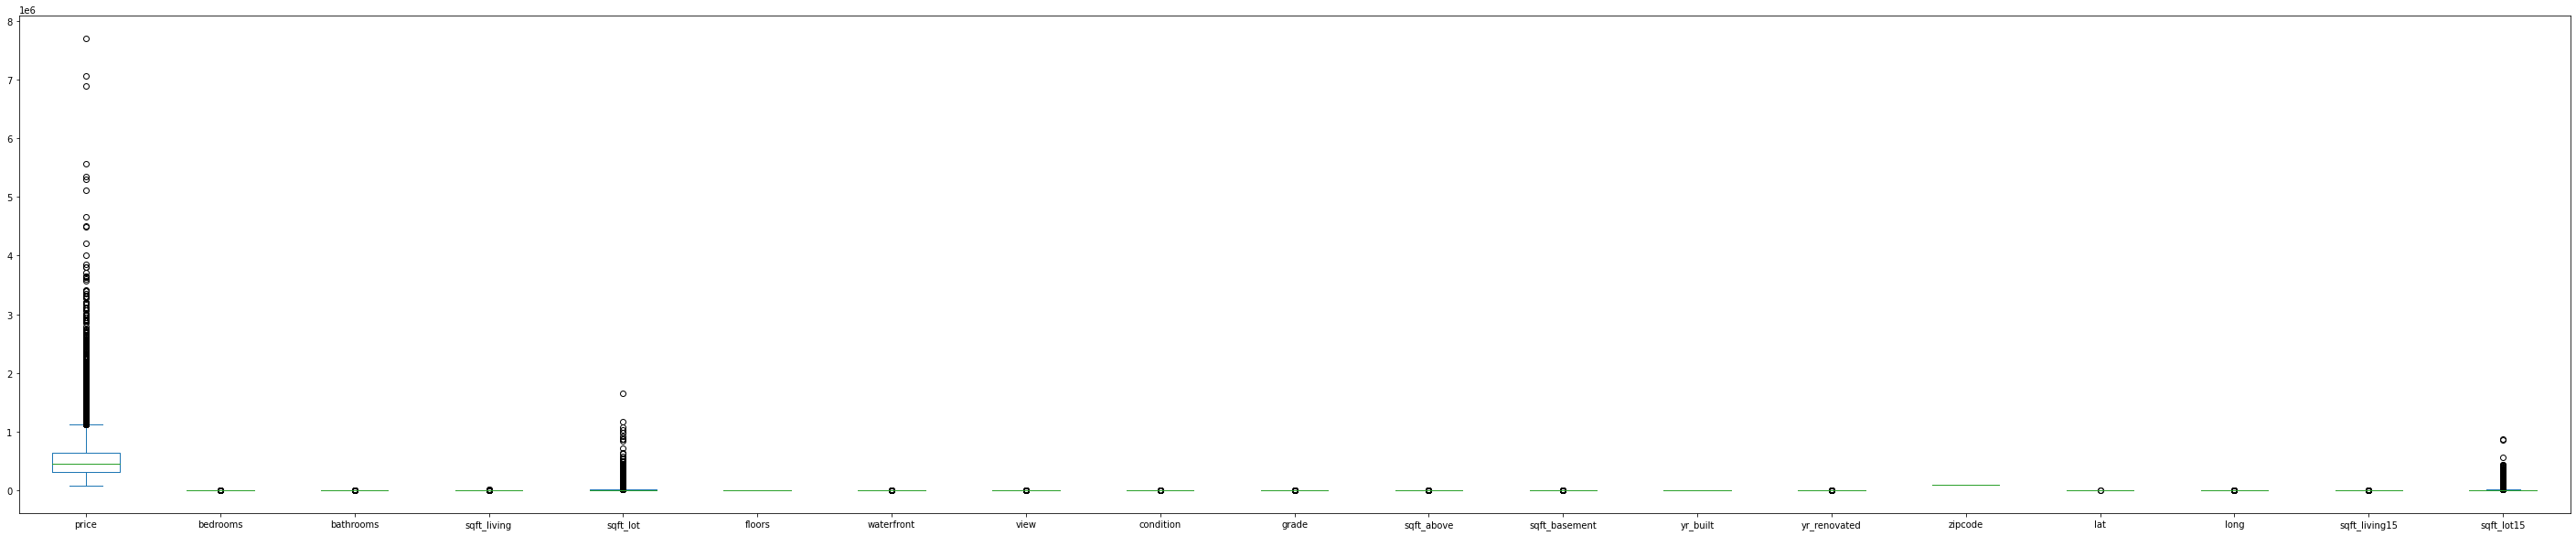

In [8]:
# boxplot representation
df.drop(columns=['id']).plot(kind='box',figsize=(50,10))
plt.show()

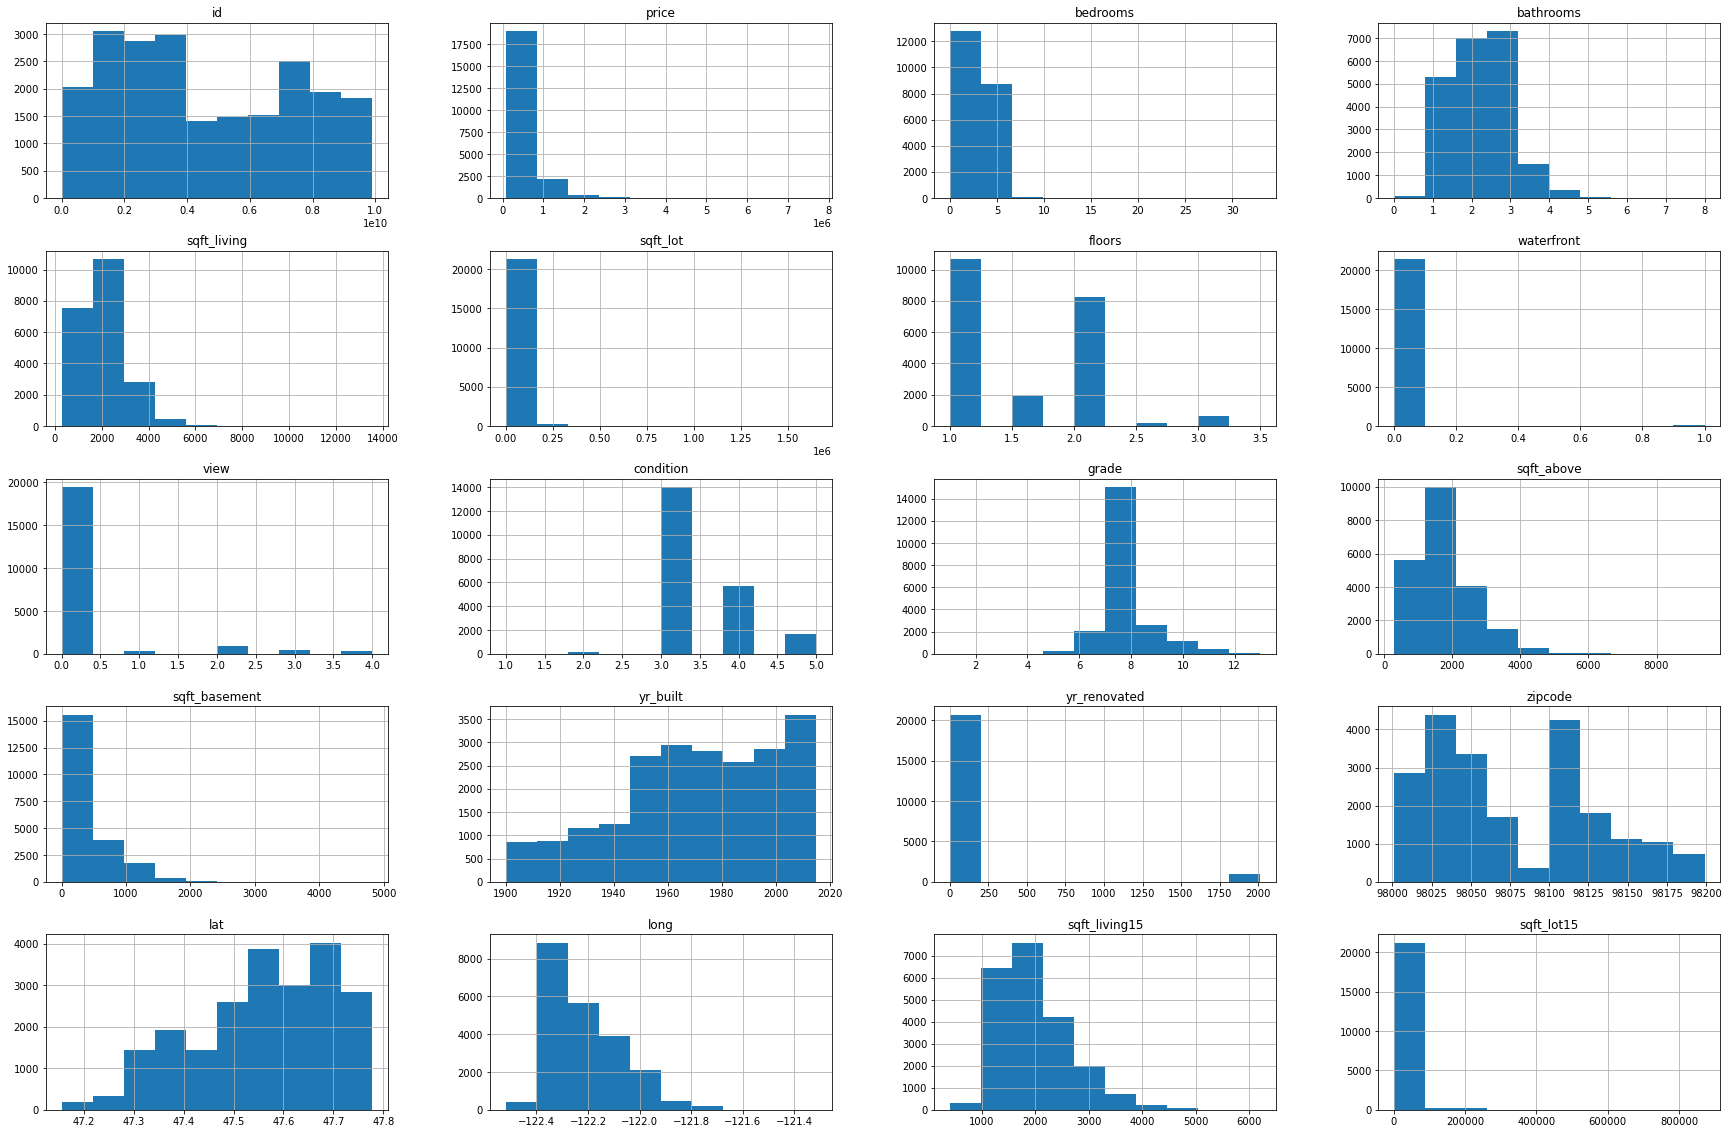

In [9]:
#to show histogram
df.hist(figsize=(30,20))
plt.show()

<AxesSubplot:>

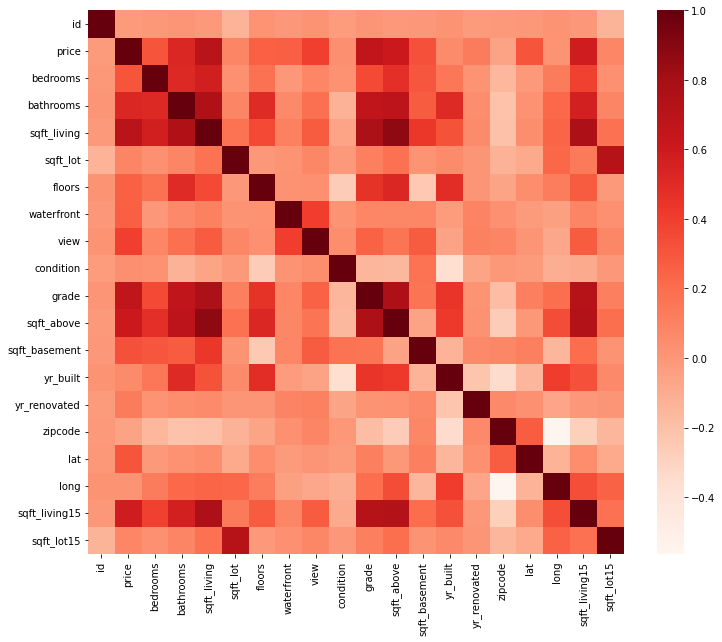

In [10]:
## Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='Reds')

<AxesSubplot:ylabel='Frequency'>

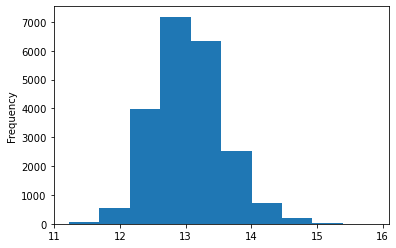

In [11]:
#histogram with price
priceTransform=np.log(df.price)
priceTransform.plot(kind='hist')

In [12]:
#find mean with its view & without
print('Mean of 1 room with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==1)]['price'].mean())
print('Mean of 1 room without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==1)]['price'].mean())
print('Mean of 2 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==2)]['price'].mean())
print('Mean of 2 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==2)]['price'].mean())
print('Mean of 3 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==3)]['price'].mean())
print('Mean of 3 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==3)]['price'].mean())
print('Mean of 4 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==4)]['price'].mean())
print('Mean of 4 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==4)]['price'].mean())

Mean of 1 room with view:  622680.0
Mean of 1 room without view:  309781.1030927835
Mean of 2 rooms with view:  918567.4838709678
Mean of 2 rooms without view:  395497.62183950166
Mean of 3 rooms with view:  1526424.21875
Mean of 3 rooms without view:  459279.99887295085
Mean of 4 rooms with view:  1928485.0
Mean of 4 rooms without view:  627859.9280912013


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

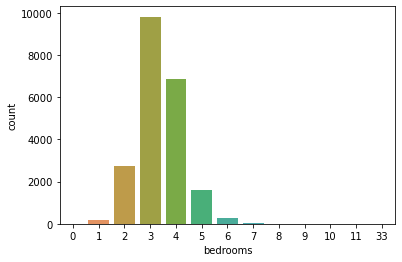

In [13]:
#use the countplot() function for plotting the count plot.
sns.countplot(x='bedrooms',data=df)

In [24]:
#by this some features  it will predicate
X = df[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].values
#will predicate price
y = df['price'].values

In [25]:
##splitting dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [31]:
#feature scaling
std = StandardScaler()
X = std.fit_transform(X)

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train,y_train) #matchine has been trained

LinearRegression()

In [29]:
## Predicting the Test set results
pred_lr = lr.predict(X_test)

In [20]:
score_lr = lr.score(X_train,y_train)
print(lr.coef_[0])
print(lr.intercept_)

-16911.933099543297
-691856.5692390434


In [21]:
#find MAE,MSE,RMSE,R2
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test,pred_lr)

print('Mae_lr: ',mae_lr)
print('Mse_lr: ',mse_lr)
print('Rmse_lr: ',rmse_lr)
print('Re score: ',r2_lr)

Mae_lr:  155469.5056600164
Mse_lr:  58528219804.06816
Rmse_lr:  241926.0626804565
Re score:  0.6111453462234759


In [22]:
#predictions with its lost
preco_lr = df['price']
predict_lr = pd.Series(pred_lr)
error_lr = preco_lr-predict_lr
data_lr = {'Price':preco_lr,'Predictions':predict_lr,'Error':error_lr}
data_prev_lr = pd.DataFrame(data_lr)
data_prev_lr.head()

,Price,Predictions,Error
0,221900.0,387229.014314,-165329.014314
1,538000.0,200843.091786,337156.908214
2,180000.0,654456.241189,-474456.241189
3,604000.0,770757.350133,-166757.350133
4,510000.0,418988.536426,91011.463574


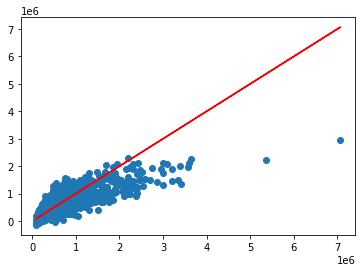

In [23]:
#visualizing data for the test set
plt.scatter(y_test,pred_lr)
plt.plot(y_test,y_test,color='red')